# NumPy is FAST
#### I have used decorators

In [6]:
import numpy as np
import time

In [2]:
def calculate_time(func):
    def new_func(*args, **kwargs):
        begin = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"Time required for {func.__name__} to execute is {end - begin}s")
        return result
    return new_func

In [3]:
@calculate_time
def using_numpy():
    my_arr = np.arange(1000000)
    for _ in range(100):
        my_arr2 = my_arr*2

In [4]:
@calculate_time
def using_python():
    my_arr = list(range(1000000))
    for _ in range(100):
        my_arr2 = [x*2 for x in my_arr]

In [5]:
using_numpy()

Time required for using_numpy to execute is 0.34011220932006836s


In [6]:
using_python()

Time required for using_python to execute is 22.771193504333496s


# NumPy Basic

In [7]:
np.random.seed(5)

In [8]:
data = np.random.randn(2, 3)   # 2 x 3 (row x column)

In [9]:
data

array([[ 0.44122749, -0.33087015,  2.43077119],
       [-0.25209213,  0.10960984,  1.58248112]])

In [10]:
data[0][0]

0.44122748688504143

In [11]:
data[1][2]

1.5824811170615634

In [12]:
data * 10

array([[ 4.41227487, -3.30870152, 24.30771187],
       [-2.5209213 ,  1.09609842, 15.82481117]])

In [13]:
data + data

array([[ 0.88245497, -0.6617403 ,  4.86154237],
       [-0.50418426,  0.21921968,  3.16496223]])

In [14]:
data.shape

(2, 3)

In [15]:
data.dtype

dtype('float64')

## Creating ndarrays
#### using array() function - This accepts any sequence-like object (including other arrays) and produces a new NumPy array containing the passed data.

#### 1-D array

In [16]:
data1 = [1, -2.3, 4, 5]
arr1 = np.array(data1)

In [17]:
arr1

array([ 1. , -2.3,  4. ,  5. ])

In [18]:
type(arr1)

numpy.ndarray

In [19]:
arr1.ndim

1

In [20]:
arr1.shape

(4,)

In [21]:
arr1.dtype

dtype('float64')

#### 2-D Array

In [22]:
data2 = [[1, 3, 4, 7], [8, 6, 4, 5]]
arr2 = np.array(data2)

In [23]:
arr2

array([[1, 3, 4, 7],
       [8, 6, 4, 5]])

In [24]:
arr2.ndim

2

In [25]:
arr2.dtype

dtype('int32')

In [26]:
arr2.shape

(2, 4)

#### other ways of creating array-
#### zeros() and ones() create arrays of 0s or 1s, respectively, with a given length or shape
#### empty() creates an array without initializing its values to any particular value (garbage values). To create a higher dimensional array with these methods, pass a tuple for the shape

In [27]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [28]:
np.zeros((2, 3))    # (row, column) or row x column

array([[0., 0., 0.],
       [0., 0., 0.]])

In [29]:
np.empty((2, 3, 2))   
#(no. of array, row, column) 2 (3 x 2) or no. of array (row x column)

array([[[1.34675987e-311, 2.47032823e-322],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 1.31370903e-076]],

       [[4.51619677e-090, 2.74072629e-057],
        [2.81299530e-033, 2.61888504e+180],
        [3.99910963e+252, 5.82471487e+257]]])

#### arange() & reshape()

In [30]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
np.arange(10).reshape(2,5)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [32]:
np.arange(20).reshape(2,2,5)

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]])

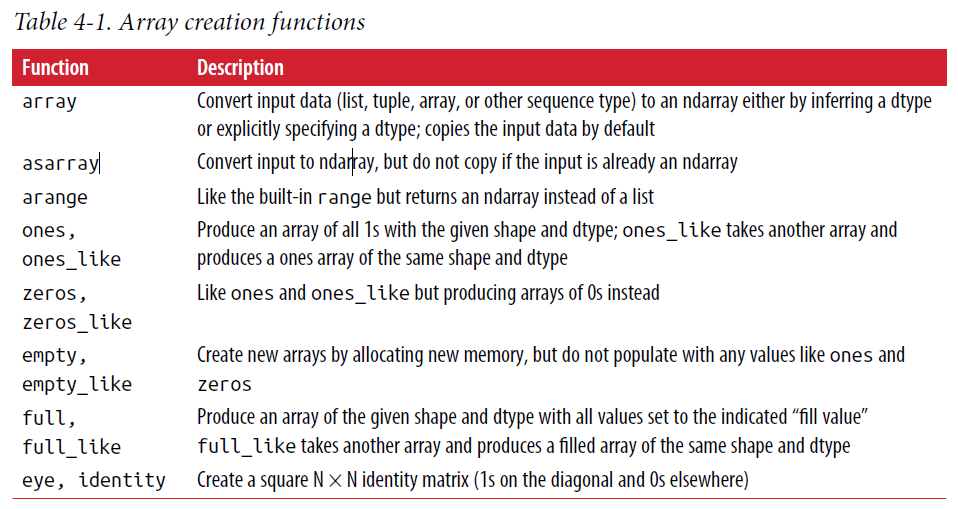

# Data Types for ndarrays

#### The data type or dtype is a special object containing the information (or metadata, data about data) the ndarray needs to interpret a chunk of memory as a particular type of data. The numerical dtypes are named the same way: a type name, like float or int, followed by a number indicating the number of bits per element. A standard double-precision floating-point value (what’s used under the hood in Python’s float object) takes up 8 bytes or 64 bits. Thus, this type is known in NumPy as float64.

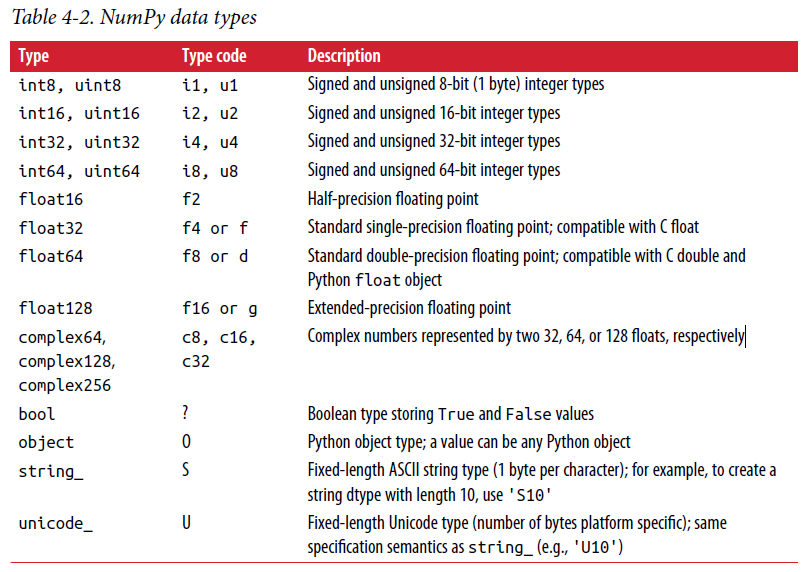

#### You can use dtype or typecode to specify the type

In [33]:
i32_arr = np.array([1, 2, 3, 4, 5], dtype='i4')  
# declaring data type using typecode
i32_arr.dtype

dtype('int32')

In [34]:
i32_arr = np.array([1, 2, 3, 4, 5], dtype=np.int32)  
# declaring data type using type
i32_arr.dtype

dtype('int32')

In [35]:
f64_arr = i32_arr.astype(np.float64)    # casting using astype()

In [36]:
f64_arr

array([1., 2., 3., 4., 5.])

In [37]:
f64_arr.dtype

dtype('float64')

#### numpy.astype() - creates a new array copy of data even if the new dtype is the same as the old dtype
#### remember casting float to integer will lead to truncation of decimal part

In [38]:
np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1]).astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [39]:
# astype can also convert string_ type array
num_string = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [40]:
num_string.astype(np.float32)

array([ 1.25, -9.6 , 42.  ], dtype=float32)

#### If casting fails ValueError will be raised. 
#### Note - NumPy aliases the Python types to its own equivalent data dtypes

In [41]:
# Another array's dtype attribute can also be used for casting-
num_string.astype(f64_arr.dtype)

array([ 1.25, -9.6 , 42.  ])

# Arithmetic with NumPy Arrays -
#### We can perform arithmetic batch operations without any for loop and this is know as vectorization

In [42]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [43]:
print(arr)

[[1. 2. 3.]
 [4. 5. 6.]]


In [44]:
arr + arr

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [45]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [46]:
arr / arr

array([[1., 1., 1.],
       [1., 1., 1.]])

In [47]:
arr * arr   # this is not matrix multiplication

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

#### Arithmetic operations with scalars propagate the scalar argument to each element in the array

In [48]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [49]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

#### Comparisons between arrays of the same size yield boolean arrays

In [50]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

In [51]:
arr > arr2

array([[ True, False,  True],
       [False,  True, False]])

#### FYI - Operations between differently sized arrays is called broadcasting

# Basic Indexing and Slicing

#### single dimesion array are similar to list

In [52]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
arr[5]

5

In [54]:
arr_slice = arr[3:2]   # not erroring out

In [55]:
arr_slice

array([], dtype=int32)

In [56]:
arr_slice = arr[2:7]

In [57]:
arr_slice

array([2, 3, 4, 5, 6])

In [58]:
arr_slice[2:4] = 15   # assigning value to all the elements in range

In [59]:
arr_slice

array([ 2,  3, 15, 15,  6])

#### Note change in arr_slice changed content of main arr from which the slice was taken the value is propagated (or broadcasted) to the entire selection. An important first distinction from Python’s built-in lists is that array slices are "views" on the original array. This means that the data is not copied, and any modifications to the view will be reflected in the source array. This is done to avoid memory issues when working on large arrays. If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array—for example, arr[2:7].copy().

In [60]:
arr

array([ 0,  1,  2,  3, 15, 15,  6,  7,  8,  9])

In [61]:
arr_slice

array([ 2,  3, 15, 15,  6])

#### The “bare” slice [:] will assign to all values in an array -

In [62]:
arr_slice[:] = 45

In [63]:
arr

array([ 0,  1, 45, 45, 45, 45, 45,  7,  8,  9])

In [64]:
arr_slice

array([45, 45, 45, 45, 45])

#### In 2 dimensional each element won't be scalar but rather will be one dimensional

In [65]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [66]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [67]:
print(arr2d)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [68]:
arr2d[1]

array([4, 5, 6])

In [69]:
arr2d[1][2]

6

In [70]:
# OR comma sperated list will aslo do
arr2d[1, 2]

6

#### Whenever we write more dimesions further the last number will be column and 2nd last will be row. 
For ex. 2 x 2 x 3 array will be two (2 x 3 arrays) i.e. two rows and three columns; 

3 x 4 x 2 x 3 array will be three (four (2 x3 arrays))

In [71]:
arr3d = np.array([ [[1,2,3],[4,5,6]], [[7,8,9],[10,11,12]] ] )

In [72]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [73]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

#### Both scalar values and arrays can be assigned to arr3d[0]

In [74]:
old_values = arr3d[0].copy()

In [75]:
arr3d[0] = 66

In [76]:
arr3d

array([[[66, 66, 66],
        [66, 66, 66]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [77]:
arr3d[0] = old_values

In [78]:
# arr3d[1, 0] gives you all of the values whose indices
# start with (1, 0), forming a 1-dimensional array:
arr3d[1, 0]

array([7, 8, 9])

# Indexing with slices

#### slicing in 1d array is simple and similar to list in python

In [79]:
arr = np.array([0, 1, 2, 3, 4, 64, 64, 64, 8, 9])
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [80]:
arr[3:6]

array([ 3,  4, 64])

#### slicing in 2d array
#### syntax - arr2d[row, column]

In [81]:
arr2d = np.array([[1,2,3], [4,5,6], [7,8,9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [82]:
arr2d[:2]  # grabbing only 1st 2 rows 0 & 1

array([[1, 2, 3],
       [4, 5, 6]])

In [83]:
arr2d[:2, :1]   # now grabbing only 1st column of 1st 2 rows

array([[1],
       [4]])

In [84]:
arr2d[:2, :1][0]   # grabbing 0th index

array([1])

In [85]:
arr2d[0][0]       # or directly is grabbing is also easy :)

1

#### note difference between below two cells
#### a colon by itself means to take the entire axis (row / column). 
#### in 1st cell (97) as colon was given in row section (arr2d[row, column]) of indexing it outputted in row format only
#### in 2nd cell (98) colon was also given in both row & column section (arr2d[row, column]) of indexing hence it outputted in row & column format both 

In [86]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [87]:
arr2d[1:3, 1]   # extracted column and presented as row

array([5, 8])

In [88]:
arr2d[1:3, 1:2]    # extracted column and presented as column

array([[5],
       [8]])

#### Two-dimensional array slicing representation - 

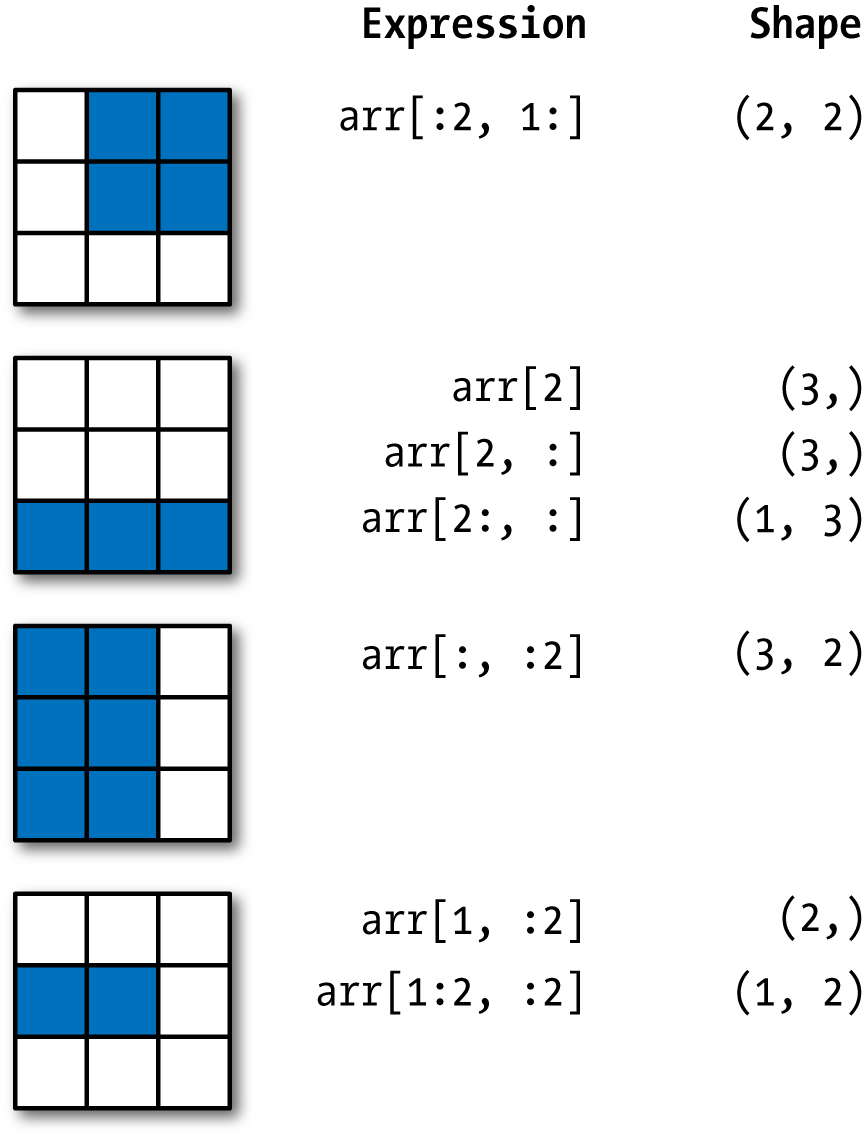

# Boolean Indexing

In [89]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [90]:
data = np.random.randn(7, 4)
data

array([[-0.9092324 , -0.59163666,  0.18760323, -0.32986996],
       [-1.19276461, -0.20487651, -0.35882895,  0.6034716 ],
       [-1.66478853, -0.70017904,  1.15139101,  1.85733101],
       [-1.51117956,  0.64484751, -0.98060789, -0.85685315],
       [-0.87187918, -0.42250793,  0.99643983,  0.71242127],
       [ 0.05914424, -0.36331088,  0.00328884, -0.10593044],
       [ 0.79305332, -0.63157163, -0.00619491, -0.10106761]])

In [91]:
names == 'Bob'   # will give boolean array with True and False values
                 # whereever there is Bob in names that will be True

array([ True, False, False,  True, False, False, False])

#### passing boolean array to datav will give you those rows where True is there

In [92]:
data[names == 'Bob']    # note 0th and 3rd rows are shown as 
                        # True was at that index in Boolean array

array([[-0.9092324 , -0.59163666,  0.18760323, -0.32986996],
       [-1.51117956,  0.64484751, -0.98060789, -0.85685315]])

#### Note - The boolean array must be of the same length as the array axis it’s indexing. You can even mix and match boolean arrays with slices or integers. Also Boolean selection will not fail if the boolean array is not the correct length, so please be careful when using this feature.

In [93]:
names1 = np.array(['a', 'b', 'a', 'c'])
names1

array(['a', 'b', 'a', 'c'], dtype='<U1')

In [94]:
names1 == 'a'

array([ True, False,  True, False])

In [95]:
data[: , names1 == 'a']     # extracted columns 0 & 2

array([[-0.9092324 ,  0.18760323],
       [-1.19276461, -0.35882895],
       [-1.66478853,  1.15139101],
       [-1.51117956, -0.98060789],
       [-0.87187918,  0.99643983],
       [ 0.05914424,  0.00328884],
       [ 0.79305332, -0.00619491]])

#### further we can combine integer slicing with this also

In [96]:
data[2:4 , names1 == 'a']

array([[-1.66478853,  1.15139101],
       [-1.51117956, -0.98060789]])

#### To select everything but 'Bob', you can either use != or negate the condition using ~

In [97]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [98]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [99]:
data

array([[-0.9092324 , -0.59163666,  0.18760323, -0.32986996],
       [-1.19276461, -0.20487651, -0.35882895,  0.6034716 ],
       [-1.66478853, -0.70017904,  1.15139101,  1.85733101],
       [-1.51117956,  0.64484751, -0.98060789, -0.85685315],
       [-0.87187918, -0.42250793,  0.99643983,  0.71242127],
       [ 0.05914424, -0.36331088,  0.00328884, -0.10593044],
       [ 0.79305332, -0.63157163, -0.00619491, -0.10106761]])

In [100]:
data[~(names != 'Bob')]

array([[-0.9092324 , -0.59163666,  0.18760323, -0.32986996],
       [-1.51117956,  0.64484751, -0.98060789, -0.85685315]])

In [101]:
condition = names!='Bob'
data[~condition]

array([[-0.9092324 , -0.59163666,  0.18760323, -0.32986996],
       [-1.51117956,  0.64484751, -0.98060789, -0.85685315]])

#### Selecting two of the three names to combine multiple boolean conditions, use boolean arithmetic operators like & (and) and | (or). Also - The Python keywords 'and' and 'or' do not work with boolean arrays. Use & (and) and | (or) instead.

In [102]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [103]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [104]:
names == 'Will'

array([False, False,  True, False,  True, False, False])

In [105]:
Bob_or_Will = (names == 'Bob') | (names == 'Will')
Bob_or_Will

array([ True, False,  True,  True,  True, False, False])

In [106]:
data

array([[-0.9092324 , -0.59163666,  0.18760323, -0.32986996],
       [-1.19276461, -0.20487651, -0.35882895,  0.6034716 ],
       [-1.66478853, -0.70017904,  1.15139101,  1.85733101],
       [-1.51117956,  0.64484751, -0.98060789, -0.85685315],
       [-0.87187918, -0.42250793,  0.99643983,  0.71242127],
       [ 0.05914424, -0.36331088,  0.00328884, -0.10593044],
       [ 0.79305332, -0.63157163, -0.00619491, -0.10106761]])

In [107]:
data[Bob_or_Will]

array([[-0.9092324 , -0.59163666,  0.18760323, -0.32986996],
       [-1.66478853, -0.70017904,  1.15139101,  1.85733101],
       [-1.51117956,  0.64484751, -0.98060789, -0.85685315],
       [-0.87187918, -0.42250793,  0.99643983,  0.71242127]])

#### Selecting data from an array by boolean indexing always creates a copy of the data, even if the returned array is unchanged.

In [108]:
data

array([[-0.9092324 , -0.59163666,  0.18760323, -0.32986996],
       [-1.19276461, -0.20487651, -0.35882895,  0.6034716 ],
       [-1.66478853, -0.70017904,  1.15139101,  1.85733101],
       [-1.51117956,  0.64484751, -0.98060789, -0.85685315],
       [-0.87187918, -0.42250793,  0.99643983,  0.71242127],
       [ 0.05914424, -0.36331088,  0.00328884, -0.10593044],
       [ 0.79305332, -0.63157163, -0.00619491, -0.10106761]])

In [109]:
Bob_or_Will_array = data[Bob_or_Will]
Bob_or_Will_array

array([[-0.9092324 , -0.59163666,  0.18760323, -0.32986996],
       [-1.66478853, -0.70017904,  1.15139101,  1.85733101],
       [-1.51117956,  0.64484751, -0.98060789, -0.85685315],
       [-0.87187918, -0.42250793,  0.99643983,  0.71242127]])

In [110]:
Bob_or_Will_array[2] = 7
Bob_or_Will_array

array([[-0.9092324 , -0.59163666,  0.18760323, -0.32986996],
       [-1.66478853, -0.70017904,  1.15139101,  1.85733101],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [-0.87187918, -0.42250793,  0.99643983,  0.71242127]])

#### Setting values with boolean arrays works in a common-sense way. To set all of the negative values in data to 0 we need only do - 

In [111]:
data[data < 0] = 0

In [112]:
data

array([[0.        , 0.        , 0.18760323, 0.        ],
       [0.        , 0.        , 0.        , 0.6034716 ],
       [0.        , 0.        , 1.15139101, 1.85733101],
       [0.        , 0.64484751, 0.        , 0.        ],
       [0.        , 0.        , 0.99643983, 0.71242127],
       [0.05914424, 0.        , 0.00328884, 0.        ],
       [0.79305332, 0.        , 0.        , 0.        ]])

In [113]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [114]:
names != 'Joe'

array([ True, False,  True,  True,  True, False, False])

In [115]:
data[names != 'Joe'] = 9
data

array([[9.00000000e+00, 9.00000000e+00, 9.00000000e+00, 9.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.03471603e-01],
       [9.00000000e+00, 9.00000000e+00, 9.00000000e+00, 9.00000000e+00],
       [9.00000000e+00, 9.00000000e+00, 9.00000000e+00, 9.00000000e+00],
       [9.00000000e+00, 9.00000000e+00, 9.00000000e+00, 9.00000000e+00],
       [5.91442432e-02, 0.00000000e+00, 3.28884293e-03, 0.00000000e+00],
       [7.93053319e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# Fancy Indexing
#### indexing using integer arrays

In [116]:
arr = np.empty((8, 4))
arr

array([[2.35541533e-312, 2.01589600e-312, 2.41907520e-312,
        1.84613634e-312],
       [2.29175545e-312, 6.79038654e-313, 6.79038653e-313,
        2.33419537e-312],
       [2.31297541e-312, 2.44029516e-312, 1.29441743e-312,
        6.79038653e-313],
       [1.40051722e-312, 2.07955588e-312, 8.70018274e-313,
        2.63127478e-312],
       [8.48798317e-313, 2.05833592e-312, 2.14321575e-312,
        6.79038654e-313],
       [1.29441743e-312, 8.27578359e-313, 2.22809558e-312,
        2.29175545e-312],
       [8.70018274e-313, 1.40051722e-312, 2.07955588e-312,
        2.35541533e-312],
       [2.01589600e-312, 2.22809558e-312, 2.29175545e-312,
        0.00000000e+000]])

In [117]:
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

#### select out a subset of the rows in a particular order, you can simply pass a list or ndarray of integers specifying the desired order

In [118]:
arr[[3, 5, 7, 0]]   # those rows are selected

array([[3., 3., 3., 3.],
       [5., 5., 5., 5.],
       [7., 7., 7., 7.],
       [0., 0., 0., 0.]])

In [119]:
arr[[-3, -5, -7, 0]]   # -ve indexing also works

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.],
       [0., 0., 0., 0.]])

#### Passing multiple index arrays does something slightly different; it selects a onedimensional array of elements corresponding to each tuple of indices

In [120]:
arr = np.arange(32).reshape(8,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [121]:
arr[[5, 6, 1, 7], [2, 3, 1, 0]]

array([22, 27,  5, 28])

In [122]:
# arr(5,2) = 22 ; arr(6,3) = 27 and so on....

In [123]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [124]:
arr[[1, 5, 7, 2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [125]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]   # use previous cell o/p to get it

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [126]:
# as colon(:) is in row section 
# it will select columns of previous cell o/p in [0, 3, 1, 2] order

#### Keep in mind that fancy indexing, unlike slicing, always copies the data into a new array.

In [127]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]] = 99

In [128]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

# Transposing Arrays and Swapping Axes
#### Transposing is a special form of reshaping that similarly returns a view on the underlying data without copying anything. Arrays have the transpose method and also the special T attribute

In [129]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [130]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [131]:
np.dot(arr.T, arr)      # similar to dot product of matrix
                        # also remember arr.T (row-5, col-3) x arr (3, 5)
                        # column of 1st matrix should match with row of 2nd

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

In [132]:
arr = np.arange(16).reshape((2, 2, 4))
arr

# axis 0 = 2
# axis 1 = 2
# axis 2 = 4

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [133]:
arr.T    # will reverse the axis from 2,2,4 to 4,2,2

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [134]:
arr.transpose((1, 0, 2)) # (axis are passed in tuple) 
# the axes have been reordered with the second axis first, 
# the first axis second, and the last axis unchanged

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [135]:
# https://www.youtube.com/watch?v=5vT553CSxas   (5:25)

#### Simple transposing with .T is a special case of swapping axes. ndarray has the method swapaxes, which takes a pair of axis numbers and switches the indicated axes to rearrange the data. Difference between transpose and swapaxes is that swapaxes can deal with only 2 axis at a time while transpose can deal with more than 2 axis at a time

In [136]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [137]:
np.shape(arr)

(2, 2, 4)

In [138]:
arr.swapaxes(1,2)       # 2,2,4 to 2,4,2  # only 1 and 2 are swapped

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [139]:
np.shape(arr.swapaxes(1,2))

(2, 4, 2)

#### swapaxes similarly returns a view on the data without making a copy.
# Universal Functions

In [140]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### unary ufunc(universal function) like - np.sqrt() & np.exp() acts on 1 array

In [141]:
np.sqrt(arr)     # orginal array is not affected

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [142]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [143]:
# Also,
# np.sqrt(arr, sqrt_arr)
# sqrt_arr is output array in which result will be outputted provided
# sqrt_arr is defined and is of same size of arr

In [144]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

#### binary ufunc like - np.add(), np.maximum() acts on 2 array

In [145]:
x = np.random.randn(8)
x

array([-0.05230815,  0.24921766,  0.19766009,  1.33484857, -0.08687561,
        1.56153229, -0.30585302, -0.47773142])

In [146]:
y = np.random.randn(8)
y

array([ 0.10073819,  0.35543847,  0.26961241,  1.29196338,  1.13934298,
        0.4944404 , -0.33633626, -0.10061435])

In [147]:
np.add(x, y)     # element wise addition

array([ 0.04843004,  0.60465613,  0.4672725 ,  2.62681196,  1.05246737,
        2.05597269, -0.64218928, -0.57834576])

In [148]:
np.maximum(x, y)     # element wise comparison

array([ 0.10073819,  0.35543847,  0.26961241,  1.33484857,  1.13934298,
        1.56153229, -0.30585302, -0.10061435])

#### np.modf() returns 2 parts (remainder(decimal), whole) of each element into 2 different array

In [149]:
arr = np.random.randn(7)
arr

array([ 1.41339802,  0.22125412, -1.31077313, -0.68956523, -0.57751323,
        1.15220477, -0.10716398])

In [150]:
remainder, whole = np.modf(arr)

In [151]:
remainder

array([ 0.41339802,  0.22125412, -0.31077313, -0.68956523, -0.57751323,
        0.15220477, -0.10716398])

In [152]:
whole

array([ 1.,  0., -1., -0., -0.,  1., -0.])

#### ufuncs accept an optional out argument that allows them to operate in-place on arrays and output the result to that out argument as seen above in np.sqrt()

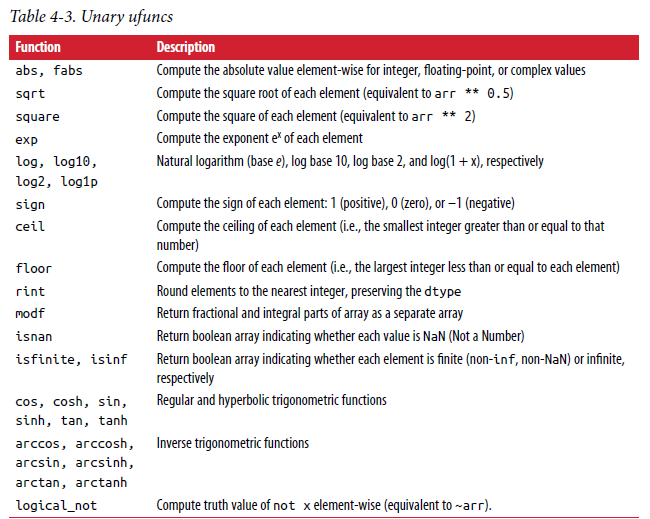

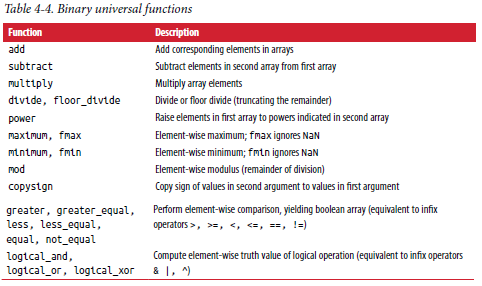

# Expressing Conditional Logic as Array Operations
#### The numpy.where(cond, arr1, arr2) function is a vectorized version of the ternary expression x if condition else y

In [153]:
import numpy as np
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [154]:
# supposing we want to create a new array based on cond array using xarr 
# & yarr then we might go with list comprehension using ternery operator
# in python

In [155]:
result = [(x if c else y) for x, c, y in zip(xarr, cond, yarr)]

In [156]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [157]:
# but this has many problems like it won't be fast with large array
# 2nd it won't work with multi-dimensional array
# using numpy.where(cond, arr1, arr2) this is very easy 

In [158]:
result = np.where(cond, xarr, yarr)
# result will take value from xarr if cond is True else from yarr
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

#### The second and third arguments to np.where don’t need to be arrays; one or both of them can be scalars. A typical use of where in data analysis is to produce a new array of values based on another array.

In [159]:
# suppose we have array with +ve and -ve values and we have to replace
# +ve value with 2 and -ve value with -2 then numpy.where can be useful
arr = np.random.randn(4,4)
arr

array([[ 2.26010677,  0.65661947,  0.12480683, -0.43570392],
       [ 0.97217931, -0.24071114, -0.82412345,  0.56813272],
       [ 0.01275832,  1.18906073, -0.07359332, -2.85968797],
       [ 0.7893664 , -1.87774088,  1.53875615,  1.82136474]])

In [160]:
condition = arr > 0
condition

array([[ True,  True,  True, False],
       [ True, False, False,  True],
       [ True,  True, False, False],
       [ True, False,  True,  True]])

In [161]:
result = np.where(condition, 2, -2)
result

array([[ 2,  2,  2, -2],
       [ 2, -2, -2,  2],
       [ 2,  2, -2, -2],
       [ 2, -2,  2,  2]])

#### You can combine scalars and arrays when using np.where. For example, we want to replace all positive values in arr with the constant 2 then :

In [162]:
np.where(arr > 0, 2, arr)

array([[ 2.        ,  2.        ,  2.        , -0.43570392],
       [ 2.        , -0.24071114, -0.82412345,  2.        ],
       [ 2.        ,  2.        , -0.07359332, -2.85968797],
       [ 2.        , -1.87774088,  2.        ,  2.        ]])

#### The arrays passed to np.where can be more than just equal-sized arrays or scalars.

# Mathematical and Statistical Methods
#### A set of mathematical functions that compute statistics about an entire array or about the data along an axis are accessible as methods of the array class. You can use aggregations (often called reductions) like sum, mean, and std (standard deviation) either by calling the array instance method or using the top-level NumPy function.

In [163]:
arr = np.arange(1,21).reshape(5,4)
arr

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

In [164]:
arr.mean()

10.5

In [165]:
np.mean(arr)

10.5

In [166]:
arr.sum()

210

#### Functions like mean and sum take an optional axis argument that computes the statistic over the given axis, resulting in an array with one fewer dimension
#### note - Here, arr.mean(1) means “compute mean along the axis 1” where arr.sum(0) means “compute sum along the axis 0

In [167]:
arr

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

In [168]:
arr.mean(axis=0)

array([ 9., 10., 11., 12.])

In [169]:
arr.mean(1)    # axis 1

array([ 2.5,  6.5, 10.5, 14.5, 18.5])

In [170]:
arr.sum(0)

array([45, 50, 55, 60])

In [171]:
arr.sum(axis=1)

array([10, 26, 42, 58, 74])

#### cumsum and cumprod do not aggregate, instead producing an array of the intermediate results

In [172]:
arr

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

In [173]:
arr.cumsum()

array([  1,   3,   6,  10,  15,  21,  28,  36,  45,  55,  66,  78,  91,
       105, 120, 136, 153, 171, 190, 210], dtype=int32)

In [174]:
arr.cumsum(axis=1)

array([[ 1,  3,  6, 10],
       [ 5, 11, 18, 26],
       [ 9, 19, 30, 42],
       [13, 27, 42, 58],
       [17, 35, 54, 74]], dtype=int32)

In [175]:
arr.cumsum(0)

array([[ 1,  2,  3,  4],
       [ 6,  8, 10, 12],
       [15, 18, 21, 24],
       [28, 32, 36, 40],
       [45, 50, 55, 60]], dtype=int32)

In [176]:
arr

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

In [177]:
arr.astype('i8').cumprod()

array([                  1,                   2,                   6,
                        24,                 120,                 720,
                      5040,               40320,              362880,
                   3628800,            39916800,           479001600,
                6227020800,         87178291200,       1307674368000,
            20922789888000,     355687428096000,    6402373705728000,
        121645100408832000, 2432902008176640000], dtype=int64)

In [178]:
arr.cumprod(axis=0)

array([[     1,      2,      3,      4],
       [     5,     12,     21,     32],
       [    45,    120,    231,    384],
       [   585,   1680,   3465,   6144],
       [  9945,  30240,  65835, 122880]], dtype=int32)

In [179]:
arr.cumprod(axis=1)

array([[     1,      2,      6,     24],
       [     5,     30,    210,   1680],
       [     9,     90,    990,  11880],
       [    13,    182,   2730,  43680],
       [    17,    306,   5814, 116280]], dtype=int32)

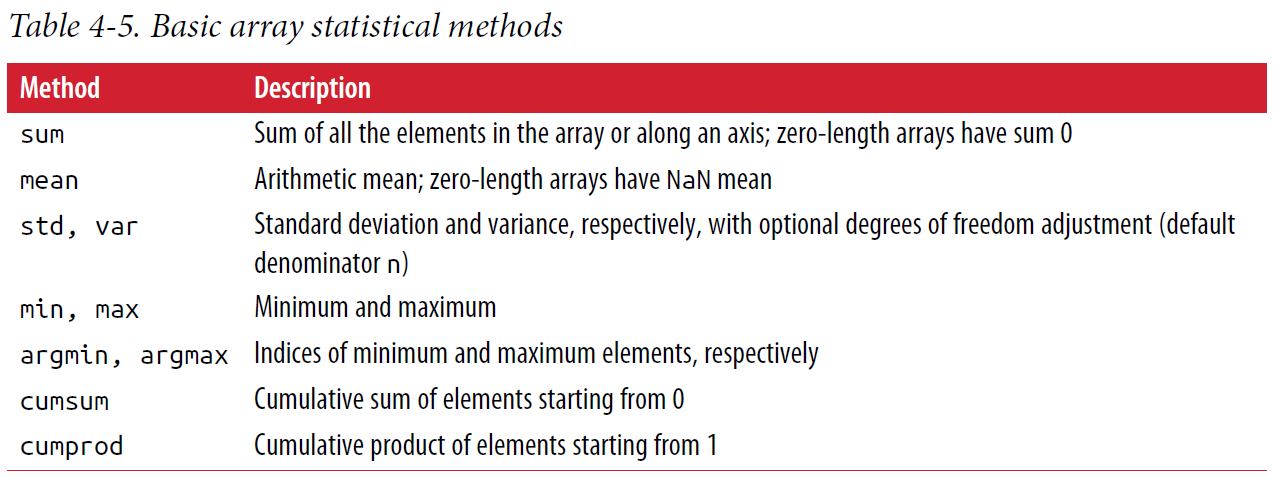

# Methods for Boolean Arrays
#### Boolean values are forced to 1 (True) and 0 (False). Thus, sum is often used as a means of counting True values in a boolean array.

In [180]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

49

#### There are two additional methods, any and all, useful especially for boolean arrays. any tests whether one or more values in an array is True, while all checks if every value is True:

In [181]:
bools = np.array([False, False, True, False])

In [182]:
bools.any()   # is any value True ?

True

In [183]:
bools.all()   # are all values True ?

False

#### These methods also work with non-boolean arrays, where non-zero elements evaluate to True.

# Sorting

#### Like Python’s built-in list type, NumPy arrays can be sorted in-place with the sort method

In [184]:
arr = np.random.randn(6)
arr

array([ 0.44295626,  0.46770521,  0.10134479, -0.05935198, -2.38669774,
        1.22217056])

In [185]:
arr.sort()
arr

array([-2.38669774, -0.05935198,  0.10134479,  0.44295626,  0.46770521,
        1.22217056])

#### You can sort each one-dimensional section of values in a multidimensional array inplace along an axis by passing the axis number to sort:

In [186]:
arr = np.random.randn(5, 3)
arr

array([[-0.81391201,  0.95626186, -0.63851056],
       [-0.14312642, -0.22418983, -1.03849524],
       [-0.17170905,  0.47634618, -0.41417827],
       [-1.26408334, -0.57321556,  0.24981732],
       [ 1.14720208,  0.83594396,  0.28740365]])

In [187]:
arr.sort(0)    # axis = 0  # which means along 0 axis
arr

array([[-1.26408334, -0.57321556, -1.03849524],
       [-0.81391201, -0.22418983, -0.63851056],
       [-0.17170905,  0.47634618, -0.41417827],
       [-0.14312642,  0.83594396,  0.24981732],
       [ 1.14720208,  0.95626186,  0.28740365]])

In [188]:
arr = np.array([1, 7, 8, 2, 3, 5, 4, 6])
arr

array([1, 7, 8, 2, 3, 5, 4, 6])

#### The top-level method np.sort returns a sorted copy of an array instead of modifying the array in-place.

In [189]:
np.sort(arr)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [190]:
arr

array([1, 7, 8, 2, 3, 5, 4, 6])

# Unique and Other Set Logic
#### np.unique, which returns the sorted unique values in an array

In [191]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [192]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [193]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [194]:
np.unique(ints)

array([1, 2, 3, 4])

In [195]:
# Pure python alternative -
sorted(set(names))

['Bob', 'Joe', 'Will']

In [196]:
sorted(set(ints))

[1, 2, 3, 4]

#### np.in1d(x,y) Check for values of x in y and returns boolean array

In [197]:
x = np.array([8, 7, 2, 4, 8, 2, 1, 0])
np.in1d(x, [7, 8, 1])

array([ True,  True, False, False,  True, False,  True, False])

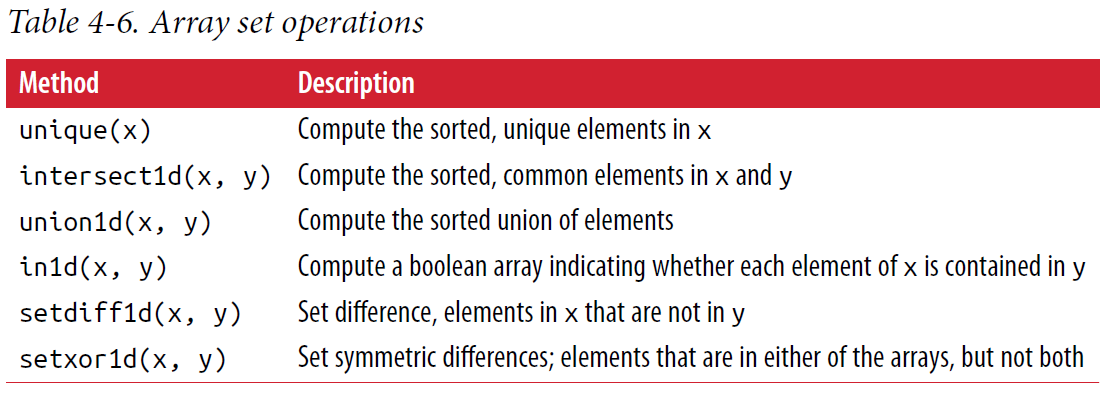

# File Input and Output with Arrays

#### NumPy is able to save and load data to and from disk either in text or binary format using np.save(\<path>, arr) and np.load(\<path>). Arrays are saved by default in an uncompressed raw binary format with file extension .npy. If file path doesn't end with.npy then it will be appended

In [198]:
arr = np.array([1, 2, 3, 4, 5, 6])

In [199]:
np.save('my_arr',arr)

In [200]:
my_arr = np.load('my_arr.npy')
my_arr

array([1, 2, 3, 4, 5, 6])

#### saving multiple arrays in an uncompressed archive can be done using np.savez and passing the arrays as keyword arguments. Remember this will store your array with file extension .npz

In [201]:
a = np.array([1, 2, 3, 4, 5, 6])
b = np.array([6, 5, 4, 3, 2, 1])
np.savez('a_and_b',a=a,b=b)

In [202]:
a_and_b = np.load('a_and_b.npz')

In [203]:
a_and_b

In [204]:
a_and_b['a']

array([1, 2, 3, 4, 5, 6])

In [205]:
a_and_b['b']

array([6, 5, 4, 3, 2, 1])

#### if you want to store data in compress file then you can use np.savez_compressed. It also uses npz as extension

In [206]:
np.savez_compressed('a_and_b_compressed',a=a,b=b)

In [207]:
a_and_b_compressed = np.load('a_and_b_compressed.npz')

In [208]:
a_and_b_compressed

In [209]:
a_and_b_compressed['a']

array([1, 2, 3, 4, 5, 6])

In [210]:
a_and_b_compressed['b']

array([6, 5, 4, 3, 2, 1])

# Linear Algebra

#### Remember there is difference between product/multiplication (\*) in arrays and dot(.) product of arrays. Multiplication is element wise while dot product refers to matrix multiplication. Also remember in dot product the column no. of 1st matrix should match row no. of 2nd matrix. For ex. if array 1 has shape (2,3) then dot product is only possible if array 2 has shape (3,2)

In [211]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [212]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [213]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [214]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [215]:
np.dot(x,y)      # x.dot(y) is equivalent to np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

#### @ symbol (as of Python 3.5) also works as an infix operator that performs matrix multiplication

In [216]:
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

#### Also we have numpy.linalg to deal with inverse, determinant, QR decomposition, etc - 

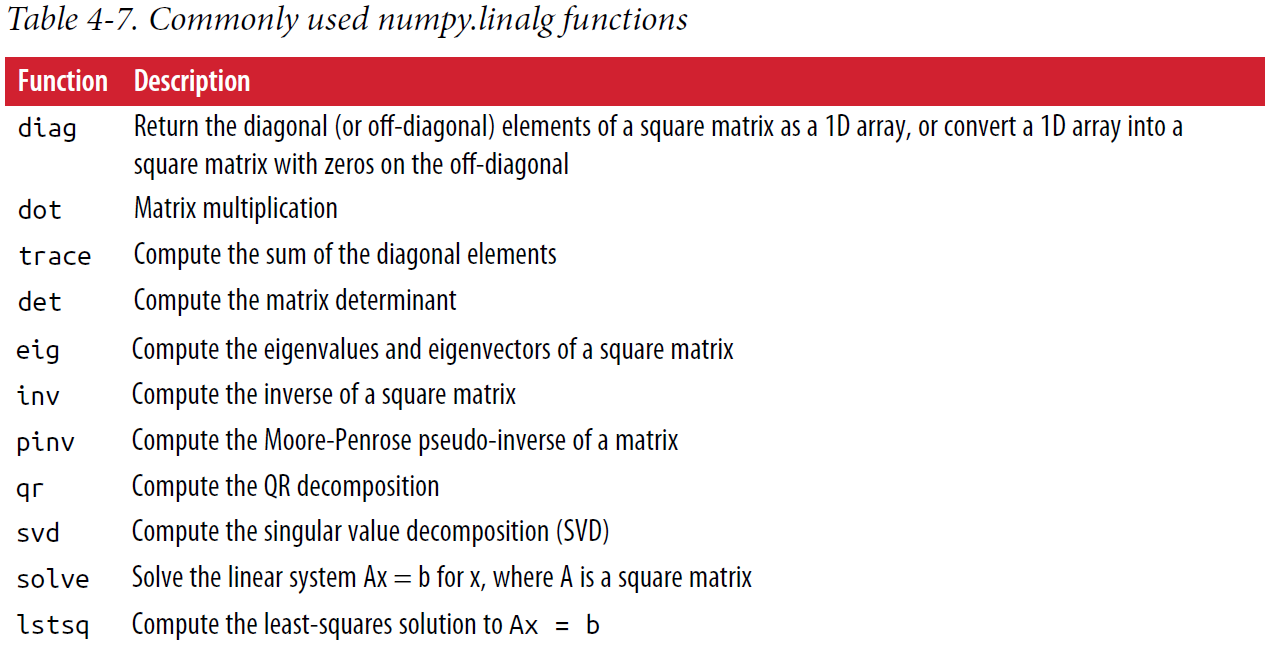

In [217]:
from numpy.linalg import qr, inv

In [218]:
X = np.random.randint(100, size=(5,5))
X

array([[95, 53, 18, 36, 36],
       [67,  9, 47,  0, 72],
       [81, 64, 25, 60, 36],
       [78,  5, 13, 73, 69],
       [77, 33, 64,  3, 94]])

In [220]:
mat = X.T.dot(X)
mat

array([[32088, 13753, 12826, 14205, 23780],
       [13753,  8100,  5154,  6212,  8307],
       [12826,  5154,  7423,  3289, 11845],
       [14205,  6212,  3289, 10234,  8775],
       [23780,  8307, 11845,  8775, 21373]])

In [221]:
inv(mat)

array([[ 0.00224974, -0.00307092,  0.00444295,  0.00084508, -0.0041188 ],
       [-0.00307092,  0.00575055, -0.00997196, -0.00273954,  0.00783297],
       [ 0.00444295, -0.00997196,  0.02063161,  0.00613429, -0.01502017],
       [ 0.00084508, -0.00273954,  0.00613429,  0.00219825, -0.00417765],
       [-0.0041188 ,  0.00783297, -0.01502017, -0.00417765,  0.01162445]])

In [222]:
mat.dot(inv(mat))    # will give you identity matrix I

array([[ 1.00000000e+00,  1.26149091e-14, -1.69309011e-15,
        -6.40459907e-15, -1.52933222e-14],
       [-2.17100643e-15,  1.00000000e+00,  6.73072709e-16,
        -4.73406037e-15,  2.35228503e-15],
       [-3.34541422e-15,  8.91300922e-15,  1.00000000e+00,
        -4.43915738e-15, -1.35100264e-14],
       [-4.39492193e-15,  3.50761087e-15, -1.28994038e-14,
         1.00000000e+00, -7.72298892e-15],
       [-4.53196508e-15,  2.18748630e-14, -3.67067488e-15,
         2.59688104e-15,  1.00000000e+00]])

In [223]:
q, r = qr(mat)     # QR decompostion

In [225]:
r    # is upper triangular matrix

array([[-46374.14639646, -19506.40083521, -19537.72658701,
        -20215.39872638, -35841.55666803],
       [     0.        ,  -2900.73171047,   2027.5998617 ,
         -1643.70023687,   4034.08211873],
       [     0.        ,      0.        ,  -3385.04735743,
          4551.32208319,  -2754.50031762],
       [     0.        ,      0.        ,      0.        ,
          -919.37052363,   -352.08311678],
       [     0.        ,      0.        ,      0.        ,
             0.        ,     46.80332291]])

# Pseudorandom Number Generation -
#### The numpy.random is used to generate whole arrays from many kinds of probability distribution. We say they are "pseudo" because they are generated by algorithm and not purely random. This algorithm uses "seed" to generate random numbers. This seed can be useful if we want generate same sequence of of random numbers.

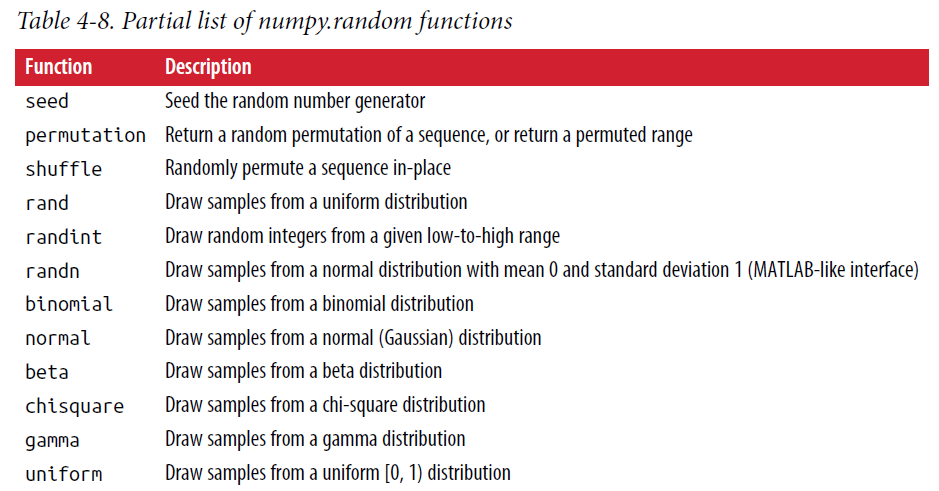

In [2]:
from random import normalvariate

In [7]:
%timeit samples = [normalvariate(0,1) for _ in range(1000000)]

2.53 s ± 191 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%timeit samples = np.random.normal(size=1000000)

73.8 ms ± 1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### The data generation functions in numpy.random use a global random seed. To avoid global state, you can use numpy.random.RandomState to create a random number generator isolated from others:

In [11]:
rng = np.random.RandomState(1234)
rng

RandomState(MT19937) at 0x213D3976D40

In [12]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

# Example: Random Walks

In [15]:
import random
from matplotlib import pyplot as plt

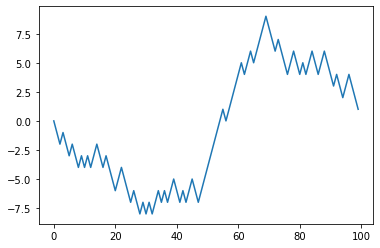

In [17]:
position = 0
walk = [position]
steps = 1000
for i in range(steps):
        step = 1 if random.randint(0,1) else -1
        position+=step
        walk.append(position)
plt.plot(walk[:100]);      # only 1st 100 values

#### walk is simply the cumulative sum of the random steps and can be evaluated as array expression. Thus suppose we want to draw 1000 coin flips at once we can use np.random module to draw 1000 flips and store as -1 and 1 - 

In [18]:
draws = np.random.randint(0,2,size=1000)

In [20]:
steps = np.where(draws > 0, 1, -1)

In [21]:
walk = steps.cumsum()    
# remember this is cumulative sum and not actual walk

#### From this we can begin to extract statistics like the minimum and maximum value along the walk’s trajectory:

In [22]:
walk.min()

-2

In [23]:
walk.max()

50

#### A more complicated statistic is the first crossing time, the step at which the random walk reaches a particular value. Here we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direction. np.abs(walk) >= 10 gives us a boolean array indicating where the walk has reached or exceeded 10, but we want the index of the first 10 or –10. Turns out, we can compute this using argmax, which returns the first index of the maximum value in the boolean array (True is the maximum value):

In [24]:
(np.abs(walk) >= 10).argmax()

63

#### Note that using argmax here is not always efficient because it always makes a full scan of the array. In this special case, once a True is observed we know it to be the maximum value.

# Simulating Many Random Walks at Once

#### If your goal was to simulate many random walks, say 5,000 of them, you can generate all of the random walks with minor modifications to the preceding code. If passed a 2-tuple, the numpy.random functions will generate a two-dimensional array of draws, and we can compute the cumulative sum across the rows to compute all 5,000 random walks in one shot:

In [27]:
nwalks = 20
nsteps = 10
draws = np.random.randint(0,2, size = (nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)   
# note here we need to calculate cumulative sum along axis = 1
walks

array([[ 1,  0,  1,  2,  3,  2,  3,  2,  1,  0],
       [ 1,  2,  1,  0, -1, -2, -1, -2, -3, -4],
       [-1, -2, -3, -4, -3, -2, -1,  0, -1,  0],
       [ 1,  0,  1,  0,  1,  0, -1,  0, -1,  0],
       [-1, -2, -3, -2, -1,  0, -1,  0,  1,  2],
       [ 1,  0,  1,  0, -1, -2, -3, -2, -3, -2],
       [-1,  0, -1, -2, -3, -2, -3, -4, -5, -6],
       [ 1,  0,  1,  0, -1, -2, -3, -2, -3, -2],
       [ 1,  2,  1,  2,  3,  4,  3,  2,  1,  0],
       [ 1,  2,  3,  4,  3,  4,  5,  4,  5,  4],
       [-1,  0, -1, -2, -1,  0,  1,  0,  1,  0],
       [ 1,  0, -1,  0, -1,  0,  1,  0, -1,  0],
       [-1,  0, -1, -2, -1,  0, -1, -2, -3, -4],
       [-1,  0,  1,  2,  1,  0, -1, -2, -3, -4],
       [-1,  0, -1, -2, -1,  0,  1,  0, -1,  0],
       [-1,  0, -1, -2, -1, -2, -1, -2, -1,  0],
       [-1, -2, -1, -2, -3, -2, -3, -4, -3, -4],
       [ 1,  0,  1,  2,  3,  2,  1,  0,  1,  2],
       [ 1,  2,  3,  2,  1,  2,  3,  2,  1,  0],
       [-1, -2, -1, -2, -3, -4, -5, -6, -7, -6]], dtype=int32)

#### Now, we can compute the maximum and minimum values obtained over all of the walks ( or for each walk):

In [33]:
walks.min()     # over all walks

-7

In [31]:
walks.min(1)    # for each walk

array([ 0, -4, -4, -1, -3, -3, -6, -3,  0,  1, -2, -1, -4, -4, -2, -2, -4,
        0,  0, -7], dtype=int32)

In [34]:
walks.max()    # over all walks

5

In [32]:
walks.max(1)    # for each walk

array([ 3,  2,  0,  1,  2,  1,  0,  1,  4,  5,  1,  1,  0,  2,  1,  0, -1,
        3,  3, -1], dtype=int32)

#### Out of these walks, let’s compute the which walk hit 4 or –4. This is slightly tricky because not all 20 of the walks reach 4. We can check this using the any method:

In [37]:
hits4 = (np.abs(walks) >= 4).any(1)    # check along axis = 1

In [38]:
hits4

array([False,  True,  True, False, False, False,  True, False,  True,
        True, False, False,  True,  True, False, False,  True, False,
       False,  True])

In [39]:
hits4.sum()   # how many reached 4 or -4 out of 20 walks

9

#### We can use this (hits4) boolean array to select out the rows of walks that actually cross the absolute 4 level and call argmax across axis 1 to get the crossing times:

In [46]:
crossing_times = (np.abs(walks[hits4]) >= 4).argmax(1)
crossing_times

array([9, 3, 7, 5, 3, 9, 9, 7, 5], dtype=int64)

#### ----------------------------------------------------------------------------------------

Aggregated Points -  

+ numpy.astype() - creates a new array copy of data even if the new dtype is the same as the old dtype

+ Note change in arr_slice changed content of main arr from which the slice was taken the value is propagated (or broadcasted) to the entire selection. An important first distinction from Python’s built-in lists is that array slices are "views" on the original array. This means that the data is not copied, and any modifications to the view will be reflected in the source array. This is done to avoid memory issues when working on large arrays. If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array—for example, arr[2:7].copy().

+ Selecting data from an array by boolean indexing always creates a copy of the data, even if the returned array is unchanged.

+ Keep in mind that fancy indexing, unlike slicing, always copies the data into a new array.

+ Transposing is a special form of reshaping that similarly returns a view on the underlying data without copying anything. Arrays have the transpose method and also the special T attribute

+ swapaxes similarly returns a view on the data without making a copy.

+ unary & binary ufunc(universal function) don't act on original array and create copy

#### *Note - Most of the contents like images, examples, statements, etc in my notebooks / notes belongs to author "Wes McKinney" of book "Python for Data Analysis". I have collected / integrated them for study purpose and I don't own it.*